<a href="https://colab.research.google.com/github/Tea-Yeon-Kim/AI-Class/blob/main/midterm/penguins-slisup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

import requests

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
response = requests.get(url)

with open('penguins.csv', 'wb') as file:
    file.write(response.content)

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

df = pd.read_csv(url)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [56]:
# 컬렴명 확인
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Text(0.5, 1.0, 'Target')

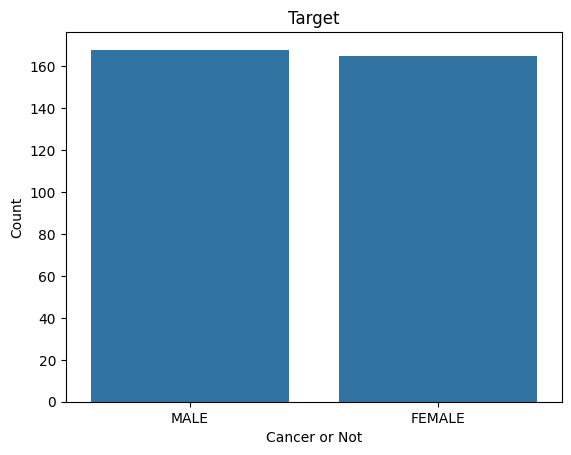

In [57]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="sex")
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("Target")

In [58]:
# 레이블 갯수 확인 (숫자)
df['sex'].value_counts()

,count
sex,
MALE,168
FEMALE,165


In [59]:
# 결측치 확인
missing_values = df.isnull().sum()

print("\n결측치 개수:")
print(missing_values)


결측치 개수:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [60]:
# 결측치 제거
df = df.dropna()

In [61]:
df['species'] = label_encoder.fit_transform(df['species'])

<ipython-input-61-97c66d4ac51a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species'] = label_encoder.fit_transform(df['species'])


In [62]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [63]:
df['island'] = label_encoder.fit_transform(df['island'])

<ipython-input-63-6edfc318e5ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['island'] = label_encoder.fit_transform(df['island'])


In [64]:
# 결측치 확인
missing_values = df.isnull().sum()

print("\n결측치 개수:")
print(missing_values)


결측치 개수:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [70]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,MALE
1,0,2,39.5,17.4,186.0,3800.0,FEMALE
2,0,2,40.3,18.0,195.0,3250.0,FEMALE
4,0,2,36.7,19.3,193.0,3450.0,FEMALE
5,0,2,39.3,20.6,190.0,3650.0,MALE


In [65]:
X=df.drop('sex',axis=1)
X = X.values
X

array([[0.00e+00, 2.00e+00, 3.91e+01, 1.87e+01, 1.81e+02, 3.75e+03],
       [0.00e+00, 2.00e+00, 3.95e+01, 1.74e+01, 1.86e+02, 3.80e+03],
       [0.00e+00, 2.00e+00, 4.03e+01, 1.80e+01, 1.95e+02, 3.25e+03],
       ...,
       [2.00e+00, 0.00e+00, 5.04e+01, 1.57e+01, 2.22e+02, 5.75e+03],
       [2.00e+00, 0.00e+00, 4.52e+01, 1.48e+01, 2.12e+02, 5.20e+03],
       [2.00e+00, 0.00e+00, 4.99e+01, 1.61e+01, 2.13e+02, 5.40e+03]])

In [66]:
y=df['sex']
y.value_counts()

,count
sex,
MALE,168
FEMALE,165


In [67]:
Y = pd.get_dummies(y).values

In [68]:
X

array([[0.00e+00, 2.00e+00, 3.91e+01, 1.87e+01, 1.81e+02, 3.75e+03],
       [0.00e+00, 2.00e+00, 3.95e+01, 1.74e+01, 1.86e+02, 3.80e+03],
       [0.00e+00, 2.00e+00, 4.03e+01, 1.80e+01, 1.95e+02, 3.25e+03],
       ...,
       [2.00e+00, 0.00e+00, 5.04e+01, 1.57e+01, 2.22e+02, 5.75e+03],
       [2.00e+00, 0.00e+00, 4.52e+01, 1.48e+01, 2.12e+02, 5.20e+03],
       [2.00e+00, 0.00e+00, 4.99e+01, 1.61e+01, 2.13e+02, 5.40e+03]])

In [69]:
Y

array([[False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [Fal

In [71]:
# 데이터 정규화 (평균 0, 표준편차 1로 변환) 정규화를 해야 되나?
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [72]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X, Y,test_size=0.2,random_state=0)

In [73]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((266, 6), (67, 6), (266, 2), (67, 2))

In [74]:

#Defining the model

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(20,input_shape=(6,),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,022 (3.99 KB)

 Trainable params: 1,022 (3.99 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.6319 - loss: 0.6840 - val_accuracy: 0.8148 - val_loss: 0.6216
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8373 - loss: 0.5802 - val_accuracy: 0.8889 - val_loss: 0.4351
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8592 - loss: 0.3711 - val_accuracy: 0.9259 - val_loss: 0.2078
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8952 - loss: 0.2452 - val_accuracy: 0.8889 - val_loss: 0.1851
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8986 - loss: 0.2439 - val_accuracy: 0.8889 - val_loss: 0.1736
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9223 - loss: 0.2267 - val_accuracy: 0.8889 - val_loss: 0.1428
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9084 - loss: 0.1998 - val_accuracy: 0.8889 - val_loss: 0.1619
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9091 - loss: 0.1619 - val_accuracy: 0.8889 - val_loss: 0.1544


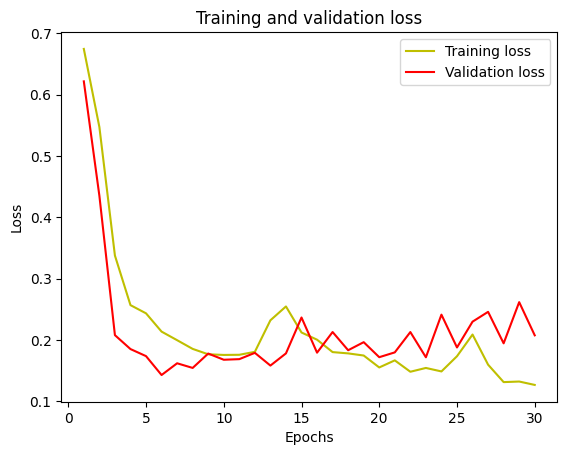

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

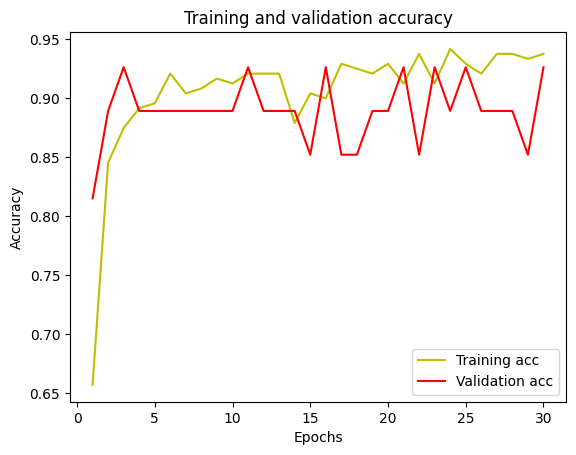

In [77]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [78]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        41
           1       0.89      0.96      0.93        26

    accuracy                           0.94        67
   macro avg       0.93      0.94      0.94        67
weighted avg       0.94      0.94      0.94        67

[[38  3]
 [ 1 25]]
